In [1]:
import seaborn as sns
import numpy as np 
import pandas as pd 
import scipy.stats as stats
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
from pylab import rcParams
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('/Users/avinashmagar/Documents/DataScience/python/Dataset/bank_churn.csv')
df

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,0
2,502,France,Female,42,8,159660.80,3,1,1
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,0
...,...,...,...,...,...,...,...,...,...
9915,771,France,Male,39,5,0.00,2,1,0
9916,516,France,Male,35,10,57369.61,1,1,0
9917,709,France,Female,36,7,0.00,1,0,1
9918,772,Germany,Male,42,3,75075.31,2,1,1


In [3]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'NumOfYrsWithBank',
       'Balance', 'NumOfProducts', 'HasCrCard', 'Closed_Acc'],
      dtype='object')

In [4]:
df.shape

(9920, 9)

In [5]:
df.size

89280

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9920 entries, 0 to 9919
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CreditScore       9920 non-null   int64  
 1   Geography         9920 non-null   object 
 2   Gender            9920 non-null   object 
 3   Age               9920 non-null   int64  
 4   NumOfYrsWithBank  9920 non-null   int64  
 5   Balance           9920 non-null   float64
 6   NumOfProducts     9920 non-null   int64  
 7   HasCrCard         9920 non-null   int64  
 8   Closed_Acc        9920 non-null   int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 697.6+ KB


In [7]:
df.describe()

,CreditScore,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
count,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000,9920.000000
mean,650.804536,38.768347,5.006351,76477.336143,1.529940,0.705847,0.203831
std,96.119083,10.129247,2.890735,62407.729207,0.581073,0.455684,0.402865
min,382.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,584.000000,32.000000,2.000000,0.000000,1.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97221.520000,1.000000,1.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,0.000000
max,850.000000,75.000000,10.000000,250898.090000,4.000000,1.000000,1.000000


In [8]:
df.dtypes

CreditScore           int64
Geography            object
Gender               object
Age                   int64
NumOfYrsWithBank      int64
Balance             float64
NumOfProducts         int64
HasCrCard             int64
Closed_Acc            int64
dtype: object

In [9]:
df.duplicated().sum()

np.int64(5)

In [10]:
df.drop_duplicates()

,CreditScore,Geography,Gender,Age,NumOfYrsWithBank,Balance,NumOfProducts,HasCrCard,Closed_Acc
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,0
2,502,France,Female,42,8,159660.80,3,1,1
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,0
...,...,...,...,...,...,...,...,...,...
9915,771,France,Male,39,5,0.00,2,1,0
9916,516,France,Male,35,10,57369.61,1,1,0
9917,709,France,Female,36,7,0.00,1,0,1
9918,772,Germany,Male,42,3,75075.31,2,1,1


In [11]:
df.isna().sum()

CreditScore         0
Geography           0
Gender              0
Age                 0
NumOfYrsWithBank    0
Balance             0
NumOfProducts       0
HasCrCard           0
Closed_Acc          0
dtype: int64

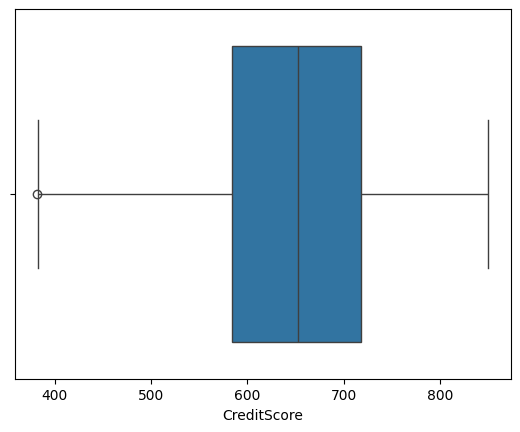

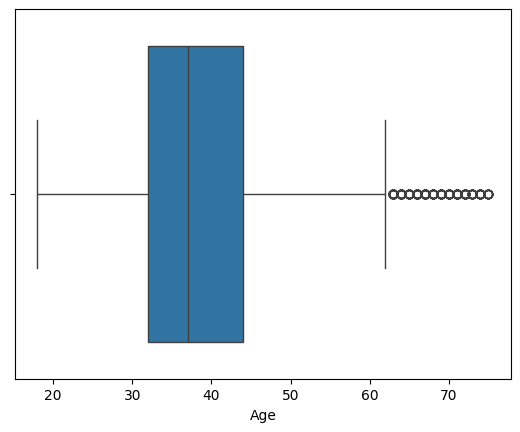

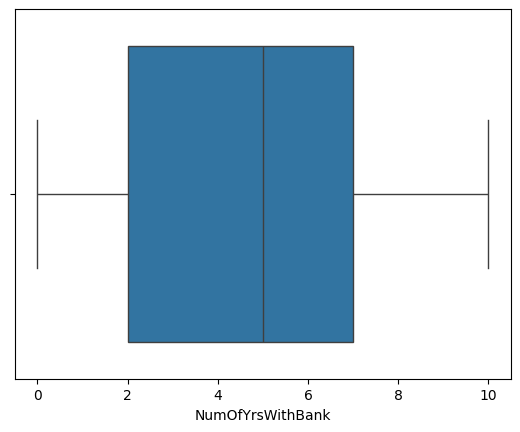

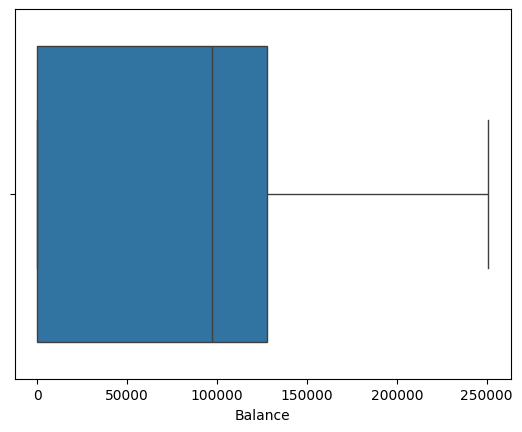

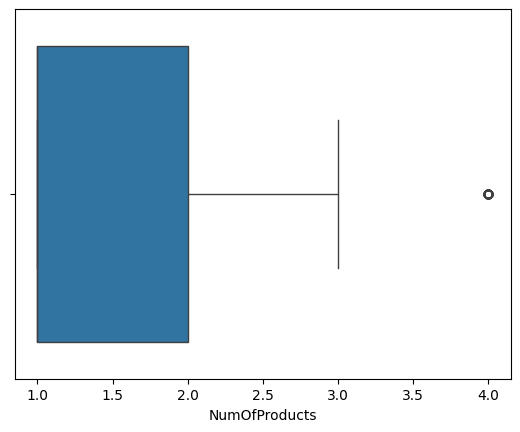

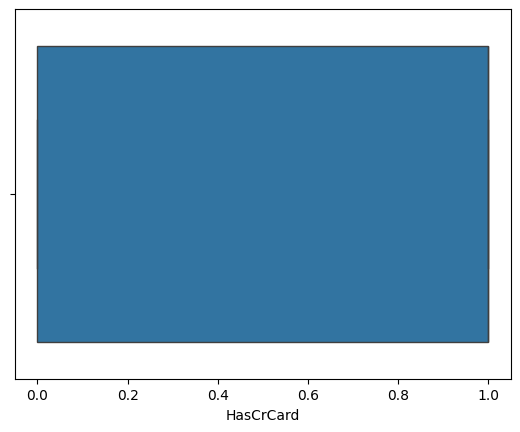

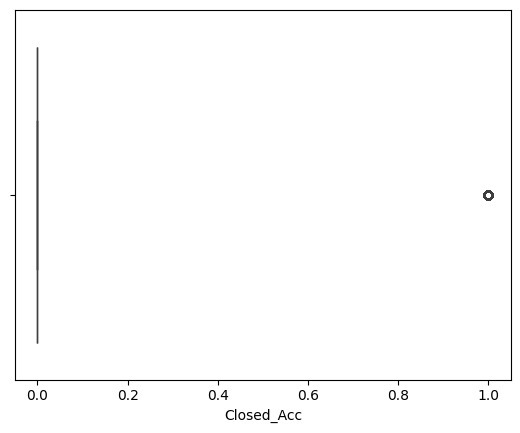

In [12]:
for i in df.select_dtypes(include=np.number).columns:
    sns.boxplot(x=df[i])        
    plt.show()

In [13]:
q1 = df['Age'].quantile(0.25)
q3 = df['Age'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['Age'] = df['Age'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(62.0), np.float64(14.0))

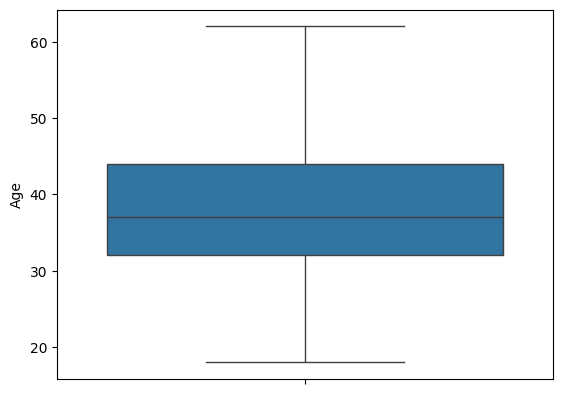

In [14]:
sns.boxplot(df['Age'])
plt.show()

In [15]:
q1 = df['NumOfProducts'].quantile(0.25)
q3 = df['NumOfProducts'].quantile(0.75)
iqr = q3 - q1  # Interquartile range
ul = q3 + 1.5 * iqr
ll = q1 - 1.5 * iqr

df['NumOfProducts'] = df['NumOfProducts'].clip(lower=ll, upper=ul)

ul, ll

(np.float64(3.5), np.float64(-0.5))

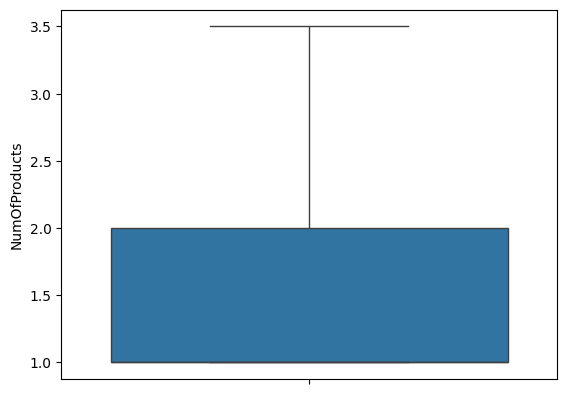

In [16]:
sns.boxplot(df['NumOfProducts'])
plt.show()